In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings('ignore')

In [2]:

df = pd.read_csv('D:/Downloads D/fakeNewsDataSet/train.csv')
df.sample(5)

,id,title,author,text,label
14999,14999,"Joshua Brown, Who Died in Self-Driving Acciden...",Rachel Abrams and Annalyn Kurtz,"CANTON, Ohio — Joshua Brown loved his Tes...",0
1329,1329,BREAKING: Attempted Assassination of Donald Tr...,Adam Garrie,"November 6, 2016 210 The attempted assassinati...",1
14712,14712,"Hillary's Secretary of State After 9/11: ""Send...",Daniel Greenfield,"Hillary's Secretary of State After 9/11: ""Send...",1
6728,6728,WATCH: Green Party candidate ‘dragged off’ deb...,Doug P.,— Dave Kinchen on FOX (@DKinchenFOX29) October...,1
7463,7463,"Google, Lagging Amazon, Races Across the Thres...",Daisuke Wakabayashi and Nick Wingfield,SAN FRANCISCO — When Amazon introduced its ...,0


In [3]:
df.shape

(20800, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [5]:
df.head(17)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [6]:
df.author.duplicated().sum()

16598

In [7]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
df.drop(['author'],axis=1,inplace=True)

In [9]:
df.drop(['title'],axis=1,inplace=True)

In [10]:
df

,id,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,Ever get the feeling your life circles the rou...,0
2,2,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...
20795,20795,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,When the Green Bay Packers lost to the Washing...,0
20797,20797,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [11]:
df.isnull().sum()

id        0
text     39
label     0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df

,id,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,Ever get the feeling your life circles the rou...,0
2,2,"Why the Truth Might Get You Fired October 29, ...",1
3,3,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...
20795,20795,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,When the Green Bay Packers lost to the Washing...,0
20797,20797,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [14]:
df['label'].value_counts()

0    10387
1    10374
Name: label, dtype: int64

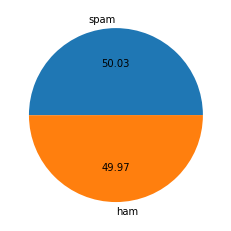

In [15]:
plt.pie(df['label'].value_counts(), labels=['spam','ham'],autopct="%0.2f")
plt.show()

In [16]:
df['num_characters'] = df['text'].apply(len)

In [17]:
df.head()

,id,text,label,num_characters
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930
1,1,Ever get the feeling your life circles the rou...,0,4160
2,2,"Why the Truth Might Get You Fired October 29, ...",1,7692
3,3,Videos 15 Civilians Killed In Single US Airstr...,1,3237
4,4,Print \nAn Iranian woman has been sentenced to...,1,938


In [18]:

# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [19]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,id,text,label,num_characters,num_words,num_sentences
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,943,37
1,1,Ever get the feeling your life circles the rou...,0,4160,822,29
2,2,"Why the Truth Might Get You Fired October 29, ...",1,7692,1454,51
3,3,Videos 15 Civilians Killed In Single US Airstr...,1,3237,612,27
4,4,Print \nAn Iranian woman has been sentenced to...,1,938,177,5


In [21]:
df.describe()

,id,label,num_characters,num_words,num_sentences
count,20761.000000,20761.000000,20761.000000,20761.000000,20761.000000
mean,10401.130341,0.499687,4552.715380,886.610520,35.094793
std,6005.142716,0.500012,5130.563491,1016.220588,46.098234
min,0.000000,0.000000,1.000000,0.000000,0.000000
25%,5201.000000,0.000000,1628.000000,316.000000,12.000000
50%,10401.000000,0.000000,3361.000000,650.000000,24.000000
75%,15603.000000,1.000000,6275.000000,1221.000000,48.000000
max,20799.000000,1.000000,142961.000000,28009.000000,1443.000000


In [22]:
#fake
df[df['label'] == 0].describe()

,id,label,num_characters,num_words,num_sentences
count,10387.000000,10387.0,10387.000000,10387.000000,10387.000000
mean,10392.644171,0.0,5214.130452,1032.260999,42.082988
std,5982.025154,0.0,4313.791236,875.446929,39.931648
min,1.000000,0.0,3.000000,1.000000,1.000000
25%,5225.500000,0.0,2397.000000,471.000000,19.000000
50%,10396.000000,0.0,4591.000000,907.000000,35.000000
75%,15565.500000,0.0,7015.000000,1377.000000,55.000000
max,20797.000000,0.0,85948.000000,17912.000000,1200.000000


In [23]:
#real
df[df['label'] == 1].describe()

,id,label,num_characters,num_words,num_sentences
count,10374.000000,10374.0,10374.000000,10374.000000,10374.000000
mean,10409.627145,1.0,3890.471467,740.777521,28.097841
std,6028.476807,0.0,5759.522906,1121.125563,50.582257
min,0.000000,1.0,1.000000,0.000000,0.000000
25%,5167.250000,1.0,1056.250000,201.000000,7.000000
50%,10404.500000,1.0,2362.000000,449.000000,16.000000
75%,15634.250000,1.0,4811.500000,915.000000,34.000000
max,20799.000000,1.0,142961.000000,28009.000000,1443.000000


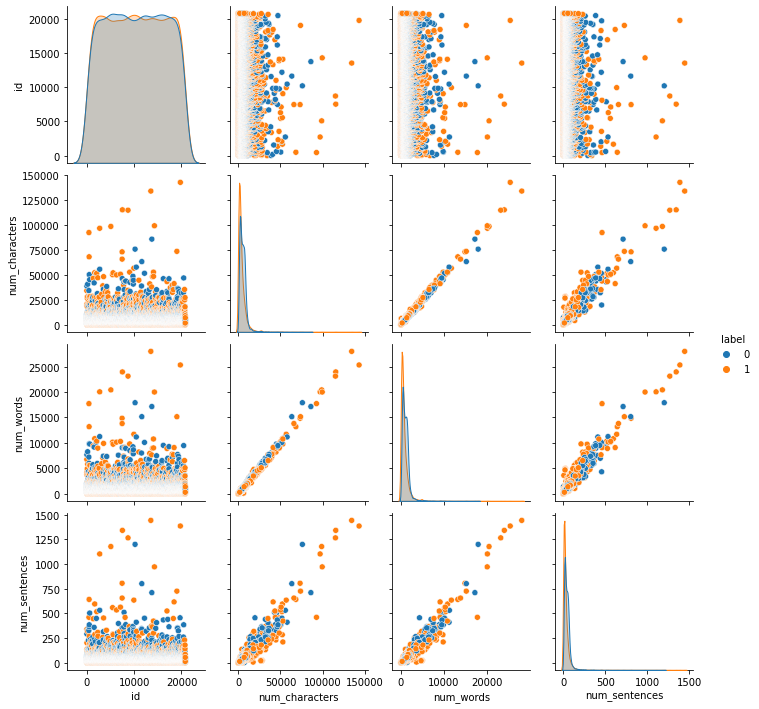

In [25]:
sns.pairplot(df,hue='label')

<AxesSubplot:>

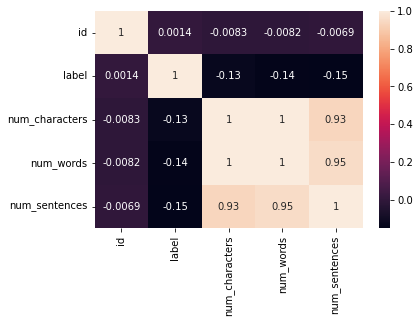

In [26]:
sns.heatmap(df.corr(),annot=True)

In [27]:
import string

from nltk.stem import PorterStemmer
ps=PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [28]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [29]:
df['text'][10]

'Organizing for Action, the activist group that morphed from Barack Obama’s first presidential campaign, has partnered with the   Indivisible Project for “online trainings” on how to protest President Donald Trump’s agenda. [Last week, Breitbart News extensively reported that Indivisible leaders are openly associated with groups financed by billionaire George Soros.  Politico earlier this month profiled Indivisible in an article titled, “Inside the protest movement that has Republicans reeling. ”  The news agency not only left out the Soros links, but failed to note that the organizations cited in its article as helping to amplify Indivisible’s message are either financed directly by Soros or have close ties to groups funded by the billionaire, as Breitbart News documented. Organizing for Action (OFA) is a   community organizing project that sprung from Obama’s 2012 campaign organization, Organizing for America, becoming a nonprofit described by the Washington Post as “advocate[ing] fo

In [30]:
transform_text(df['text'][10])

'organ action activist group morph barack obama first presidenti campaign partner indivis project onlin train protest presid donald trump agenda last week breitbart news extens report indivis leader openli associ group financ billionair georg soro politico earlier month profil indivis articl titl insid protest movement republican reel news agenc left soro link fail note organ cite articl help amplifi indivis messag either financ directli soro close tie group fund billionair breitbart news document organ action ofa commun organ project sprung obama 2012 campaign organ organ america becom nonprofit describ washington post advoc ing presid polici recent facebook post titl take deep breath take action ofa call constitu lobbi particularli hard februari 26 lawmak home district post includ link guid releas indivis organ trump stay tune onlin train invit call coalit partner like indivis guid ofa post state paul sperri write new york post relat manual publish ofa partner indivis advis protest g

In [33]:
df['transformed_text'] = df['text'].apply(transform_text)

In [34]:
df.head()

,id,text,label,num_characters,num_words,num_sentences,transformed_text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1,4930,943,37,hous dem aid even see comey letter jason chaff...
1,1,Ever get the feeling your life circles the rou...,0,4160,822,29,ever get feel life circl roundabout rather hea...
2,2,"Why the Truth Might Get You Fired October 29, ...",1,7692,1454,51,truth might get fire octob 29 2016 tension int...
3,3,Videos 15 Civilians Killed In Single US Airstr...,1,3237,612,27,video 15 civilian kill singl us airstrik ident...
4,4,Print \nAn Iranian woman has been sentenced to...,1,938,177,5,print iranian woman sentenc six year prison ir...


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [36]:
real_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))


Text(0.5, 1.0, 'Words Repeated most in Real News')

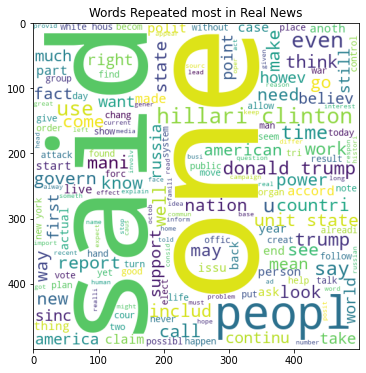

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(real_wc)
plt.title("Words Repeated most in Real News")

In [38]:
fake_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))


Text(0.5, 1.0, 'Words Repeated most in Fake News')

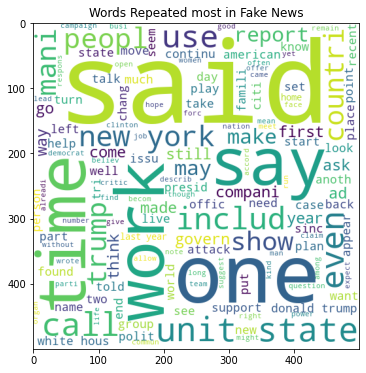

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(fake_wc)
plt.title("Words Repeated most in Fake News")

In [40]:
real_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        real_corpus.append(word)

In [41]:
fake_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        fake_corpus.append(word)

In [42]:
len(real_corpus)


3666259

In [43]:
len(fake_corpus)

4967770

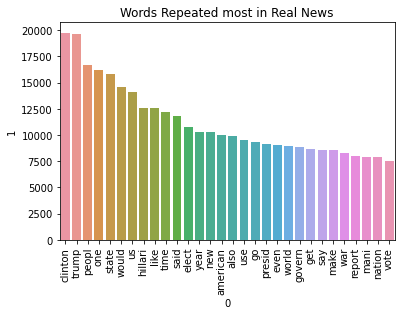

In [46]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(real_corpus).most_common(30))[0],pd.DataFrame(Counter(real_corpus).most_common(30))[1])
plt.title("Words Repeated most in Real News")
plt.xticks(rotation='vertical')
plt.show()


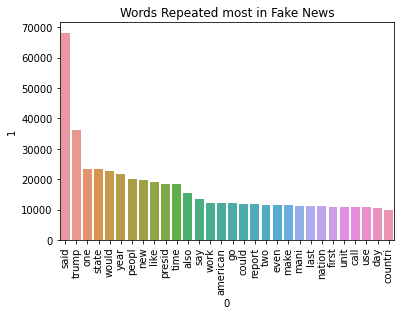

In [47]:
from collections import Counter
plt.title("Words Repeated most in Fake News")
sns.barplot(pd.DataFrame(Counter(fake_corpus).most_common(30))[0],pd.DataFrame(Counter(fake_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000)

In [49]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(20761, 10000)

In [50]:
y = df['label'].values

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [58]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
dt=DecisionTreeClassifier()
mnb = MultinomialNB()
rt=RandomForestClassifier()


In [59]:
rt.fit(X_train,y_train)
y_pred1 = rt.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9345051769804961
0.9488866396761133


In [54]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8926077534312545
0.9210526315789473


In [60]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rt,open('model.pkl','wb'))